# Análise de Dados do Google Play Store App's Rating
<br>
<br>

### Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

### Content
Each app (row) has values for catergory, rating, size, and more.

### Acknowledgements
This information is scraped from the Google Play Store. This app information would not be available without it.

### Inspiration
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

link Kaggle: https://www.kaggle.com/lava18/google-play-store-apps 

## Importando as bibliotecas

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lendo os dados do meu github

In [55]:
# Fazendo a leitura do Dataset que está em meu github
df = pd.read_csv("https://github.com/vinibeni28/Google-Play-Store-Rating-DataAnalysis/blob/master/googleplaystore.csv?raw=true")
# Imprimindo as 5 primeiras linhas
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [56]:
# Analisando quantas colunas e quantas linhas tem meu dataset.
df.shape

(10841, 13)

In [57]:
# Sumário da Estatística
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


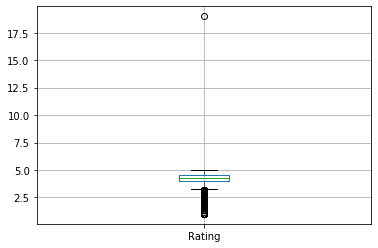

In [58]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251ED3F8D48>]],
      dtype=object)

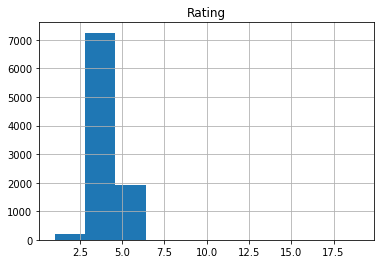

In [59]:
df.hist()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning / Limpando os Dados

 Primeiro vamos contar o número de dados que estão faltando no Dataset

In [61]:
# Esse metodo vai mostrar onde eu tenho nulos.
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
# Após verificar os dados vamos contar quantos nulo temos em cada coluna.
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [63]:
# Como mostrado acima se o dado é maior que 5 então ele é um outlier.
# Vamos contar quantos dados são maiores que 5, ou seja, quantos outliers nós temos na coluna rating.
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [64]:
# Remove Outlier
df.drop([10472],inplace = True)

In [65]:
# Verificar se a linha foi realmente deletada. 
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [66]:
df[df.Rating > 5] # Confirmando se não há rating maior que 5. É possível verificar que não há mais linhas.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


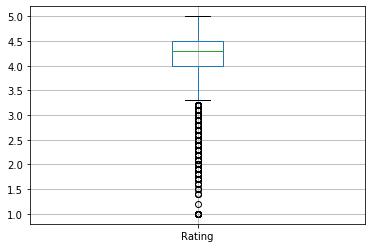

In [67]:
# Montando o boxplot novamente
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251ED634A08>]],
      dtype=object)

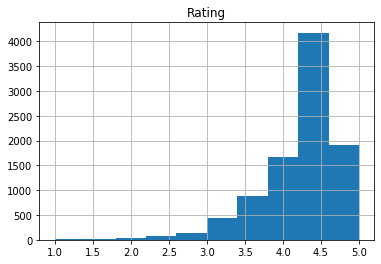

In [68]:
# Montando o histograma novamente sem o outlier
df.hist()

**Removendo colunas com 90% de celulas vazias**

In [69]:
limite = len(df)*0.1
limite

1084.0

In [70]:
# Remove os valores faltantes. 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
df.dropna(thresh = limite, axis = 1, inplace = True)

In [71]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [72]:
# Mostra o número de colunas e linhas.
df.shape

(10840, 13)

## Manipulação dos dados

Preenchendo os valores nulos com valores apropriados usando a função agregada.

In [73]:
# Definição da função 
def coloca_media(series):
    return series.fillna(series.median())

In [74]:
df.Rating = df['Rating'].transform(coloca_media)

In [75]:
# Conta o número de nulo em cada coluna.
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Valores Categóricos são um tipo de dados pandas que correspondem a variáveis categóricas nas estatísticas. Uma variável categórica assume um número limitado e geralmente fixo de valores possíveis (categorias; níveis em R). Exemplos são sexo, classe social, tipo sanguíneo, afiliação a país, tempo de observação ou classificação por meio de escalas Likert.
<br>
fonte: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [76]:
# Modos das variáveis categóricas.
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [77]:
# Preenchendo os valores categoricos com a moda
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace = True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace = True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace = True)

In [78]:
# Contando o numero de nulos em cada coluna
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [79]:
# Convertendo o price, Reviews and Ratings em valores numéricos.
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [80]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [81]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [82]:
# Describe após a limpeza dos dados.
df.describe() 

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Visualização dos Dados

In [83]:
# Agrupar por categoria e usar a função .agg que é usada para agregar dados de um dataframe.
# fonte: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
grp = df.groupby("Category")
x = grp["Rating"].agg(np.mean)
y = grp["Price"].agg(np.sum)
z = grp["Reviews"].agg(np.mean)


In [84]:
# Imprimindo a média da categoria por Rating ordenada.
print(x.sort_values(ascending = False))

Category
EVENTS                 4.395313
EDUCATION              4.388462
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.335498
PERSONALIZATION        4.328827
PARENTING              4.300000
GAME                   4.286888
BEAUTY                 4.283019
HEALTH_AND_FITNESS     4.280059
SHOPPING               4.263077
SOCIAL                 4.261017
WEATHER                4.248780
SPORTS                 4.236458
PRODUCTIVITY           4.226651
MEDICAL                4.216199
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
AUTO_AND_VEHICLES      4.205882
FAMILY                 4.204564
PHOTOGRAPHY            4.197910
FOOD_AND_DRINK         4.185827
BUSINESS               4.182391
COMMUNICATION          4.180103
NEWS_AND_MAGAZINES     4.161837
COMICS                 4.160000
FINANCE                4.151639
TRAVEL_AND_LOCAL       4.132946
LIFESTYLE              4.131414
ENTERTAINMENT          4.126174
VIDEO_PLAYERS          4.084000
TOOLS                  4.080071

In [85]:
# Imprimindo a somas dos preços ordenado.
print(y.sort_values(ascending = False))

Category
FINANCE                2900.83
FAMILY                 2434.78
LIFESTYLE              2360.87
MEDICAL                1439.96
GAME                    287.30
TOOLS                   267.25
PRODUCTIVITY            250.93
BUSINESS                185.27
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
BOOKS_AND_REFERENCE     119.77
EVENTS                  109.99
SPORTS                  100.00
COMMUNICATION            83.14
HEALTH_AND_FITNESS       67.34
TRAVEL_AND_LOCAL         49.95
WEATHER                  32.42
DATING                   31.43
MAPS_AND_NAVIGATION      26.95
EDUCATION                17.96
SOCIAL                   15.97
AUTO_AND_VEHICLES        13.47
VIDEO_PLAYERS            10.46
PARENTING                 9.58
FOOD_AND_DRINK            8.48
ENTERTAINMENT             7.98
ART_AND_DESIGN            5.97
SHOPPING                  5.48
NEWS_AND_MAGAZINES        3.98
LIBRARIES_AND_DEMO        0.99
COMICS                    0.00
BEAUTY                    0.00

In [86]:
# Imprimindo a médias de Reviews ordenada.
print(z.sort_values(ascending = False))

Category
COMMUNICATION          2.107138e+06
SOCIAL                 2.105903e+06
GAME                   1.385859e+06
PHOTOGRAPHY            6.373631e+05
VIDEO_PLAYERS          6.307439e+05
SHOPPING               4.424662e+05
ENTERTAINMENT          3.971688e+05
TOOLS                  3.240629e+05
PRODUCTIVITY           2.691438e+05
EDUCATION              2.538191e+05
TRAVEL_AND_LOCAL       2.427051e+05
PERSONALIZATION        2.279238e+05
MAPS_AND_NAVIGATION    2.237902e+05
FAMILY                 2.080255e+05
NEWS_AND_MAGAZINES     1.922292e+05
SPORTS                 1.844536e+05
WEATHER                1.781065e+05
HEALTH_AND_FITNESS     1.111253e+05
BOOKS_AND_REFERENCE    9.506090e+04
FOOD_AND_DRINK         6.994748e+04
COMICS                 5.638793e+04
FINANCE                4.795281e+04
HOUSE_AND_HOME         4.518619e+04
LIFESTYLE              3.372457e+04
DATING                 3.115931e+04
BUSINESS               3.033598e+04
ART_AND_DESIGN         2.637600e+04
PARENTING          

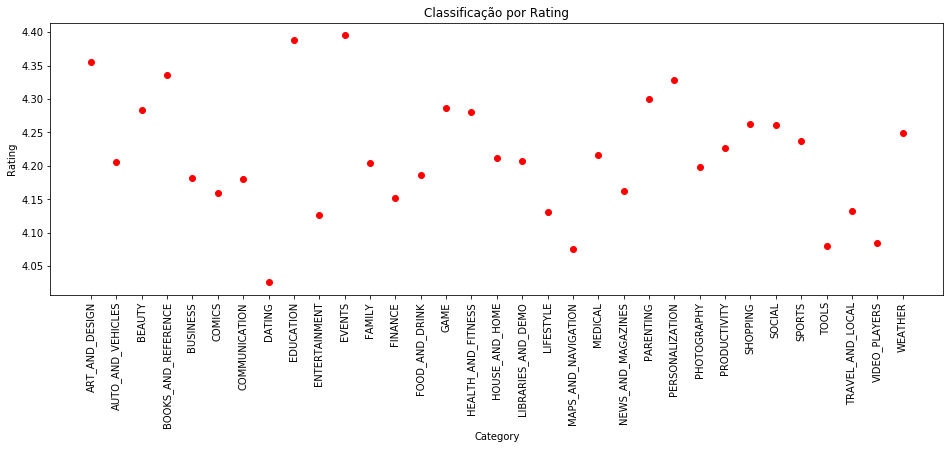

In [112]:
# Plotando o gráfico.
plt.figure(figsize = (16,5))
plt.plot(x, 'ro', color = 'r')
plt.xticks(rotation = 90)
plt.title('Classificação por Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

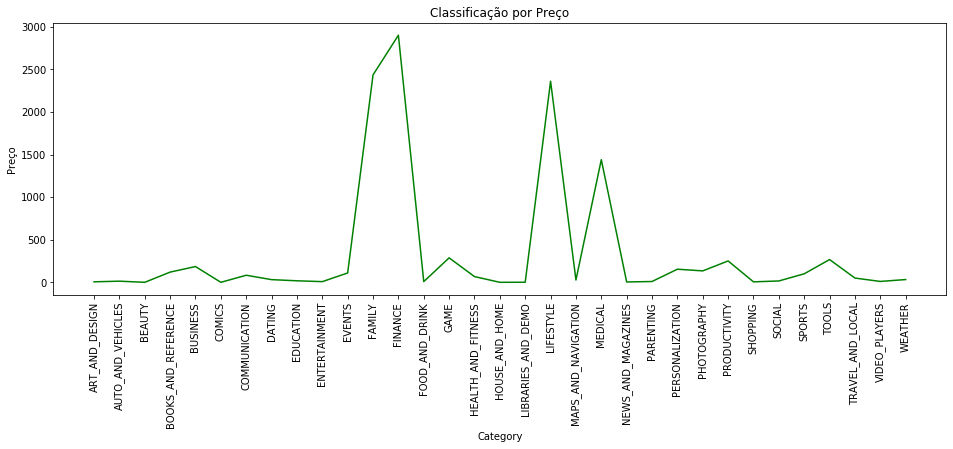

In [110]:
# Plotando o gráfico.
plt.figure(figsize = (16,5))
plt.plot(y, 'r', color = 'g')
plt.xticks(rotation = 90)
plt.title('Classificação por Preço')
plt.xlabel('Category')
plt.ylabel('Preço')
plt.show()

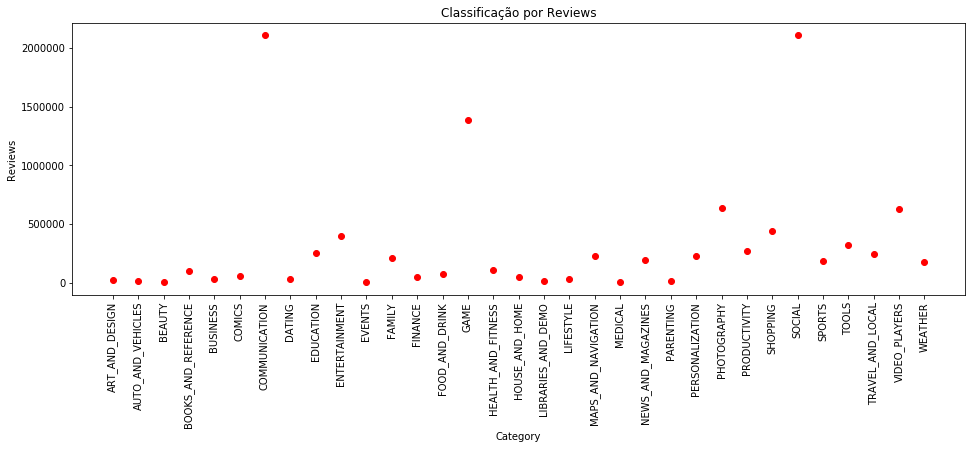

In [114]:
# Plotando o gráfico.
plt.figure(figsize = (16,5))
plt.plot(z, 'ro', color = 'r')
plt.xticks(rotation = 90)
plt.title('Classificação por Reviews')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()

## Conclusão

Após finalizar o processo de limpeza é possível fazer várias análises nos gráficos acima. Por exemplo, no gráfico de Reviews os aplicativos que mais precisam de revisão são Comunicação, Social e Games. 